In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy  as np
from datetime import datetime
%matplotlib inline
covid19 = pd.read_csv('Countries_covid19.csv')

In [78]:
covid19.Date_FirstFatality.fillna('2020-03-21', inplace = True)
covid19.Date_FirstConfirmedCase = pd.to_datetime(covid19.Date_FirstConfirmedCase)
covid19.Date_FirstFatality = pd.to_datetime(covid19.Date_FirstFatality)
covid19.drop(['Lockdown_Date','Lockdown_Type'], axis = 1, inplace = True)
covid19['Country_Region'] = covid19['Country_Region'].replace('Taiwan*', 'Taiwan')
covid19 = covid19.drop(covid19[covid19['Country_Region'] == 'Diamond Princess'].index, axis = 0)
covid19 = covid19.drop(covid19[covid19['Country_Region'] == 'MS Zaandam'].index, axis = 0)

In [79]:
covid19.isnull().sum()

Country_Region             0
Population_Size            0
Tourism                    0
Date_FirstFatality         0
Date_FirstConfirmedCase    0
Latitude                   0
Longtitude                 0
Mean_Age                   0
Country_Code               0
dtype: int64

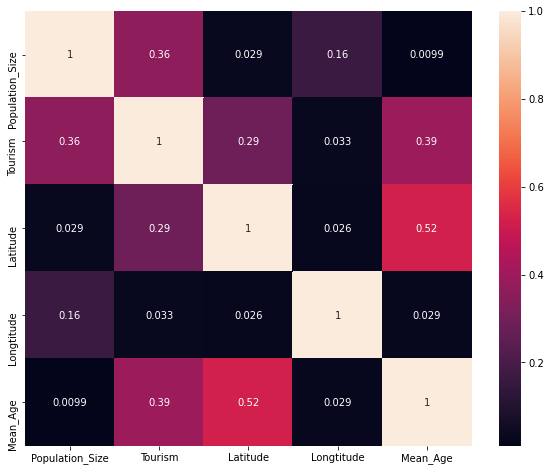

In [81]:
plt.figure(figsize = (10,8))
sns.heatmap(covid19.corr(), annot = True)
#b, t = plt.ylim()
#plt.ylim(b + 0.5, t - 0.5)

In [82]:
covid19['Country_Region'].values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',

In [83]:
covid19.sort_values('Mean_Age', ascending = False)

,Country_Region,Population_Size,Tourism,Date_FirstFatality,Date_FirstConfirmedCase,Latitude,Longtitude,Mean_Age,Country_Code
86,Japan,126529100,31192000,2020-02-14,2020-01-23,36.204824,138.252924,46.3,JPN
65,Germany,82905782,38881000,2020-03-10,2020-01-28,51.165691,10.451526,45.9,DEU
84,Italy,60421760,61567200,2020-02-22,2020-02-01,41.871940,12.567380,45.9,ITA
135,Portugal,10283822,16186000,2020-03-18,2020-03-03,39.399872,-8.224454,43.9,PRT
25,Bulgaria,7025037,9273000,2020-03-12,2020-03-09,42.733883,25.485830,43.5,BGR
...,...,...,...,...,...,...,...,...,...
4,Angola,30809762,218000,2020-03-30,2020-03-21,-11.202692,17.873887,16.4,AGO
34,Chad,15477751,14000,2020-03-21,2020-03-20,15.454166,18.732207,16.1,TCD
107,Mali,19077690,14000,2020-03-30,2020-03-26,17.570692,-3.996166,16.0,MLI
172,Uganda,42723139,14000,2020-03-21,2020-03-22,1.373333,32.290275,15.8,UGA


In [84]:
#Covid-19 cases around the world

m = folium.Map(location = [0, 0], zoom_start = 2, max_zoom = 6)
for i in range(len(covid19)):
    folium.Circle(location = [covid19.iloc[i]['Latitude'], covid19.iloc[i]['Longtitude']], 
                  tooltip = '<li><bold> Country : ' + str(covid19.iloc[i]['Country_Region']) + '<li><bold> Population : ' 
                  + str(covid19.iloc[i]['Population_Size']) + '<li><bold> Tourism : '
                  + str(covid19.iloc[i]['Tourism']) + '<li><bold> Mean Age : ' + str(covid19.iloc[i]['Mean_Age']), 
                  radius = covid19.iloc[i]['Mean_Age']*4000, 
                  color = 'blue',
                  fill = True, 
                  fill_color = 'purple'
).add_to(m)
#m.save('world_map.html')
m

In [85]:
df_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

# Cases dataset

df_cases = df_cases[df_cases['Province/State'].isnull()]
df_cases = df_cases.drop('Province/State', axis = 1)
df_cases = df_cases.drop(df_cases[df_cases['Country/Region'] == 'Diamond Princess'].index, axis = 0)
df_cases = df_cases.drop(df_cases[df_cases['Country/Region'] == 'MS Zaandam'].index, axis = 0)
df_cases['Country/Region'] = df_cases['Country/Region'].replace('Taiwan*', 'Taiwan')

# Deaths dataset

df_deaths = df_deaths[df_deaths['Province/State'].isnull()]
df_deaths = df_deaths.drop('Province/State', axis = 1)
df_deaths = df_deaths.drop(df_deaths[df_deaths['Country/Region'] == 'Diamond Princess'].index, axis = 0)
df_cases = df_cases.drop(df_cases[df_cases['Country/Region'] == 'MS Zaandam'].index, axis = 0)
df_deaths['Country/Region'] = df_deaths['Country/Region'].replace('Taiwan*', 'Taiwan')

In [86]:
# Some countries are not included in the dataset like China, Australia, Canada etc.

m = folium.Map(location = [0, 0], zoom_start = 2, max_zoom = 6)
for i in range(len(df_cases)):
    folium.Circle(location = [df_cases.iloc[i]['Lat'], df_cases.iloc[i]['Long']], 
                  tooltip = '<li><bold> Country : ' + str(df_cases.iloc[i]['Country/Region']) + '<li><bold> Number of cases: ' 
                  + str(df_cases.iloc[i, -1]),
                  radius = float(df_cases.iloc[i, -1]) * 0.8, 
                  color = 'blue',
                  fill = True, 
                  fill_color = 'blue'
).add_to(m)
#m.save('world_map.html')
m

In [87]:
df_cases = df_cases.sort_values('Country/Region')
df_cases = df_cases.reset_index(drop = True)
covid19 = covid19.sort_values('Country_Region')
covid19 = covid19.reset_index(drop = True)

In [88]:
# Covid-19 Infection / Population size ratio
# Certain countries are not included in the dataset like China, Australia, Canada etc.

def color(radius):
    if radius < 3e-3 * 3e7:
        return 'green'
    elif 3e-3 * 3e7 < radius <  8e-3 * 3e7:
        return 'purple'
    else:
        return 'red'

m = folium.Map(location = [0, 0], zoom_start = 2, max_zoom = 6)
for i in df_cases['Country/Region'].values:
    if i in covid19['Country_Region'].values:
        radius = float((df_cases[df_cases['Country/Region'] ==  i].iloc[0,-1]) * 3e7 / covid19[covid19['Country_Region'] ==  i]['Population_Size'])
        folium.Circle(location = [df_cases[df_cases['Country/Region'] ==  i]['Lat'], df_cases[df_cases['Country/Region'] ==  i]['Long']], 
                      tooltip = '<li><bold> Country : ' + str(i) + '<li><bold> Number of cases: ' 
                      + str(df_cases[df_cases['Country/Region'] ==  i].iloc[0,-1]),
                      radius = radius,
                      color = color(radius),
                      fill = True, 
                      fill_color = color(radius)
    ).add_to(m)
#m.save('world_map.html')
m

In [89]:
# Covid-19 Death case / Population size ratio
# Certain countries are not included in the dataset like China, Australia, Canada etc.

def color(radius):
    if radius < 3e-3 * 3e7:
        return 'green'
    elif 3e-3 * 3e7 < radius <  8e-3 * 3e7:
        return 'purple'
    else:
        return 'red'

m = folium.Map(location = [0, 0], zoom_start = 2, max_zoom = 6)
for i in df_deaths['Country/Region'].values:
    if i in covid19['Country_Region'].values:
        radius = float((df_deaths[df_deaths['Country/Region'] ==  i].iloc[0,-1]) * 6e8 / covid19[covid19['Country_Region'] ==  i]['Population_Size'])
        folium.Circle(location = [df_deaths[df_deaths['Country/Region'] ==  i]['Lat'], df_deaths[df_deaths['Country/Region'] ==  i]['Long']], 
                      tooltip = '<li><bold> Country : ' + str(i) + '<li><bold> Number of death cases: ' 
                      + str(df_deaths[df_deaths['Country/Region'] ==  i].iloc[0,-1]),
                      radius = radius,
                      color = color(radius),
                      fill = True, 
                      fill_color = color(radius)
    ).add_to(m)
#m.save('world_map.html')
m